In [1]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from NeuralNetwork.Network import Network
from NeuralNetwork.Layers.Input import Input
from NeuralNetwork.Layers.Dense import Dense
from NeuralNetwork.Activations.Sigmoid import Sigmoid
from NeuralNetwork.Losses.MSE import MSE
from NeuralNetwork.Metrics import Metric, Plot

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Предобработка данных

## Загрузка данных

In [5]:
df = pd.read_csv('Mushroom_dataset.csv', names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], header=None)
rows, columns = df.shape

## Описание данных

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
for column in df.columns:
    print(f"{column}: ")
    print(df[column].unique())

class: 
['EDIBLE' 'POISONOUS']
cap-shape: 
['CONVEX' 'FLAT' 'BELL' 'SUNKEN' 'KNOBBED' 'CONICAL']
cap-surface: 
['SMOOTH' 'FIBROUS' 'SCALY' 'GROOVES']
cap-color: 
['WHITE' 'YELLOW' 'BROWN' 'GRAY' 'RED' 'PINK' 'PURPLE' 'GREEN' 'BUFF'
 'CINNAMON']
bruises: 
['BRUISES' 'NO']
odor: 
['ALMOND' 'ANISE' 'NONE' 'PUNGENT' 'CREOSOTE' 'FOUL' 'FISHY' 'SPICY'
 'MUSTY']
gill-attachment: 
['FREE' 'ATTACHED']
gill-spacing: 
['CROWDED' 'CLOSE']
gill-size: 
['NARROW' 'BROAD']
gill-color: 
['WHITE' 'PINK' 'BROWN' 'GRAY' 'BLACK' 'CHOCOLATE' 'PURPLE' 'GREEN' 'RED'
 'BUFF' 'YELLOW' 'ORANGE']
stalk-shape: 
['TAPERING' 'ENLARGING']
stalk-root: 
['BULBOUS' 'CLUB' 'ROOTED' 'EQUAL' '?']
stalk-surface-above-ring: 
['SMOOTH' 'FIBROUS' 'SILKY' 'SCALY']
stalk-surface-below-ring: 
['SMOOTH' 'SCALY' 'FIBROUS' 'SILKY']
stalk-color-above-ring: 
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'CINNAMON' 'YELLOW' 'ORANGE']
stalk-color-below-ring: 
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'YELLOW' 'CINNAMON' 'ORANGE']
veil-t

In [10]:
params = pd.DataFrame()
params.index = ['Количество', '% пропусков', 'Мощность', 'Мода', 'Частота']
for column in df.columns:
    params[column] = [len(df[column]), df[column].isna().sum() * 100 / len(df[column]), df[column].nunique(), df[column].mode().values[0], df[column].value_counts()[df[column].mode().values[0]]]

params = params.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:limegreen" if i!=1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:steelblue" if i<60 and i >= 30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:limegreen" if i<30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None)))
params

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Количество,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
% пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Мощность,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
Мода,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
Частота,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,4864,3800,5316,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


## Распределения

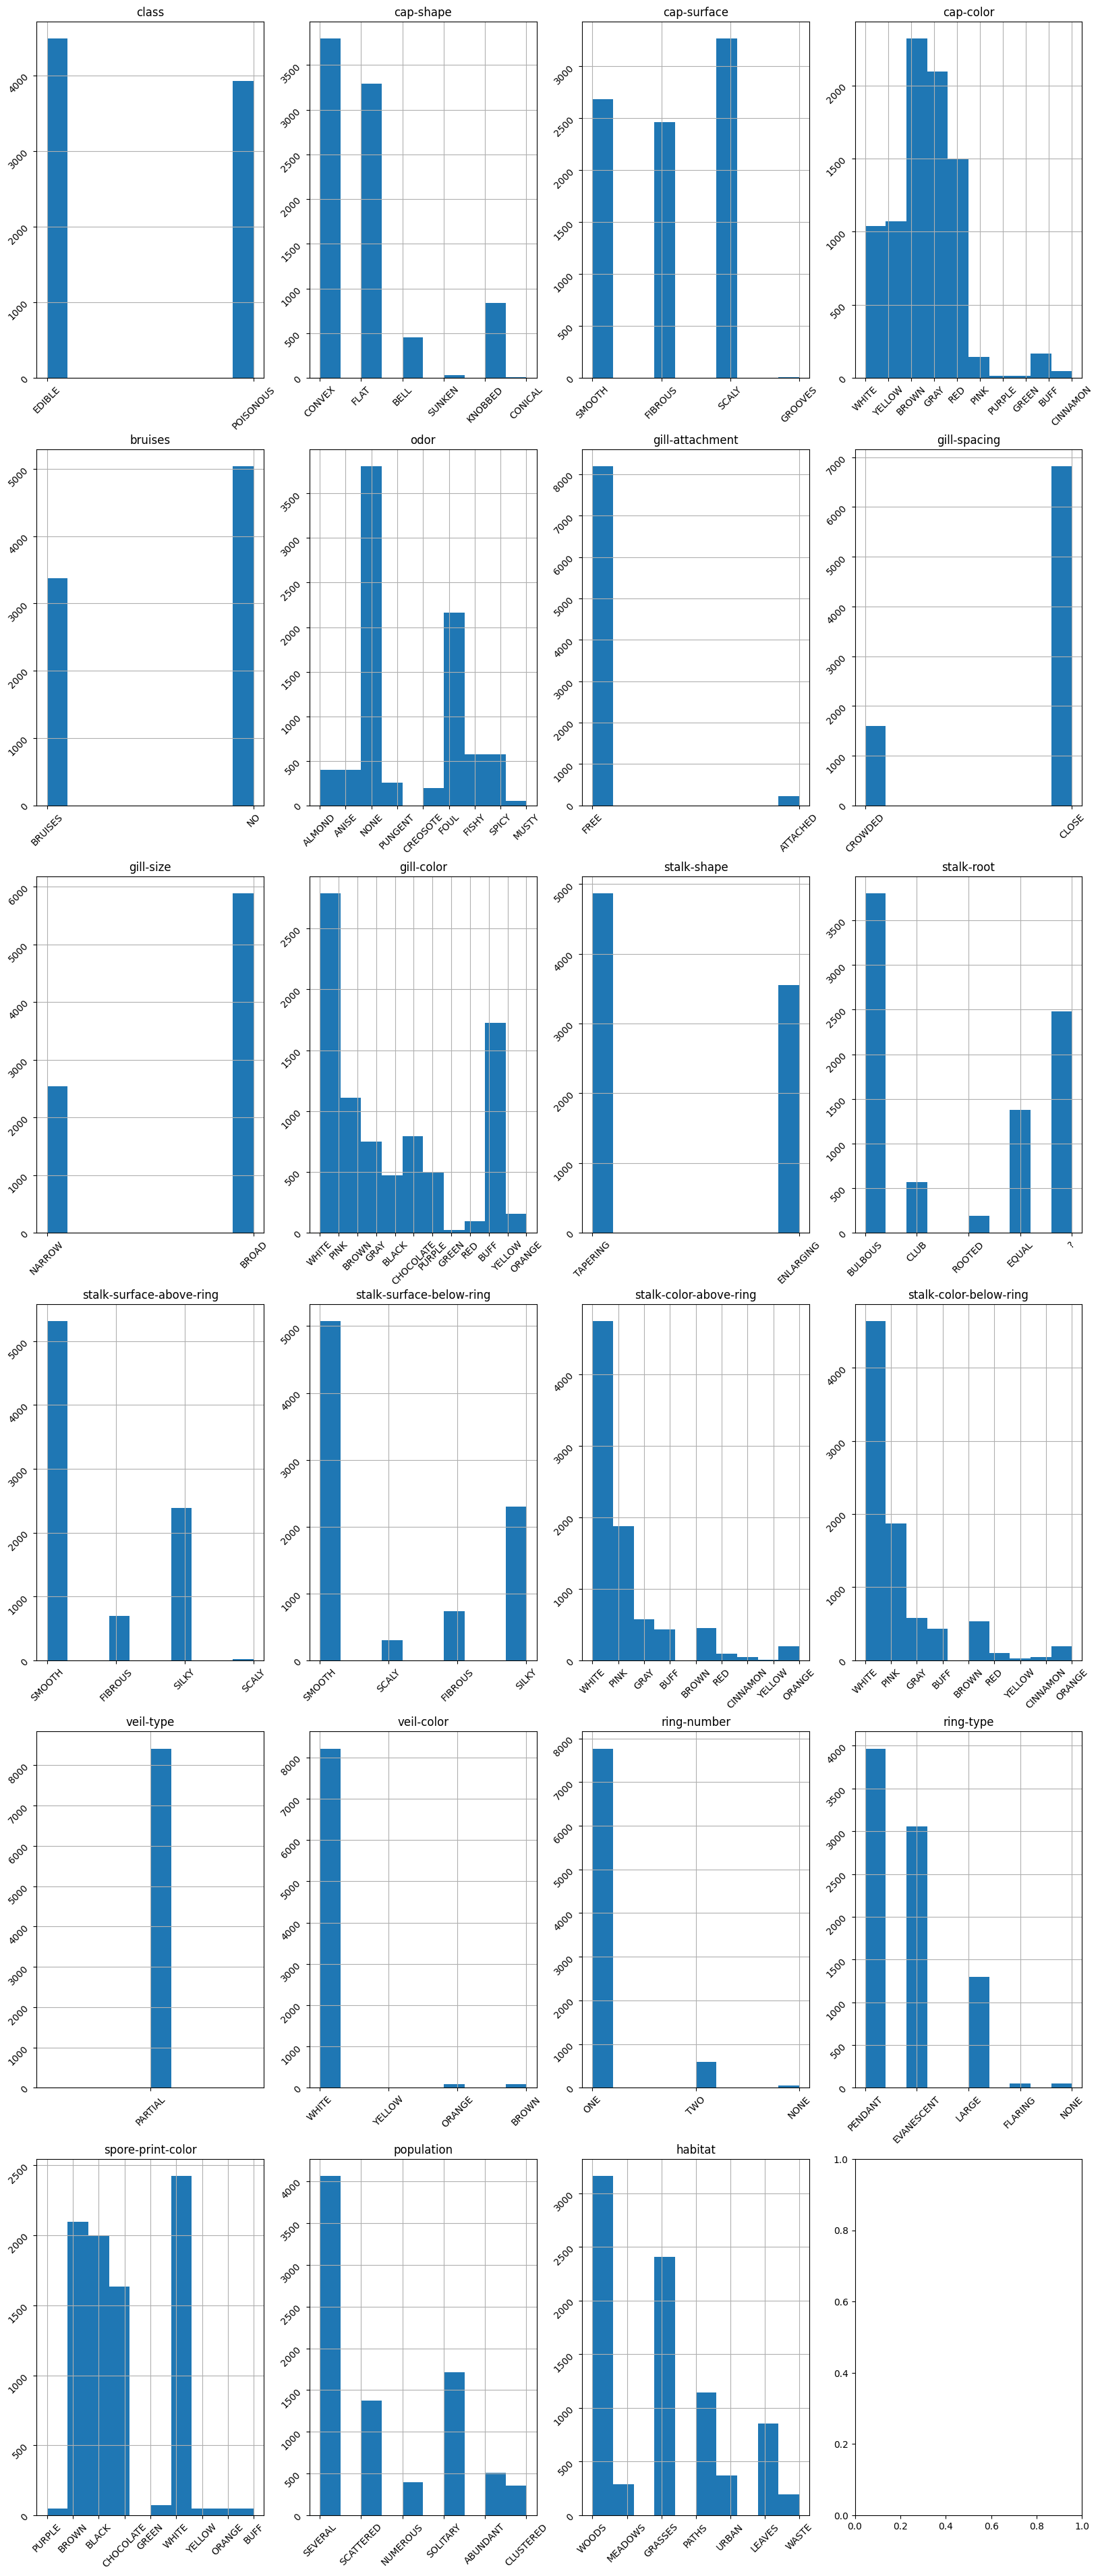

In [11]:
if columns % 4 == 0:
    f, ax = plt.subplots(int(columns // 4), 4, figsize=(20,int(columns // 4) * 8))
else:
    f, ax = plt.subplots(int(columns // 4) + 1, 4, figsize=(20,(int(columns // 4) + 1) * 8))

i = 0
j = 0
for column in df.columns:
    if j == 4:
        j = 0
        i += 1

    df[column].hist(ax=ax[i, j])
    ax[i, j].set_title(column)
    ax[i, j].tick_params(labelrotation=45)
    j += 1

## Баланс классов

<function matplotlib.pyplot.show(close=None, block=None)>

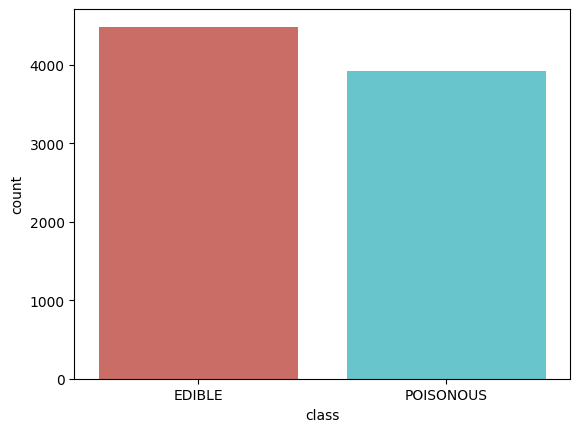

In [12]:
sns.countplot(x='class', data=pd.DataFrame(df['class']), palette='hls')
plt.show

## Обработка категориальных признаков

In [13]:
target_le = LabelEncoder()
df['class'] = target_le.fit_transform(df['class'])

for column in df.drop(columns=['class']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,0,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,0,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,0,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,0,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,1,1,3,3,7,7,0,2,1,4,6,4,6


In [15]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

## Важность признаков

In [16]:
rfc = RandomForestClassifier()
rfc.fit(df.drop(columns=['class']), df['class'])
imp = pd.Series(rfc.feature_importances_, df.drop(columns=['class']).columns[0:len(df.drop(columns=['class']).columns)]).sort_values()

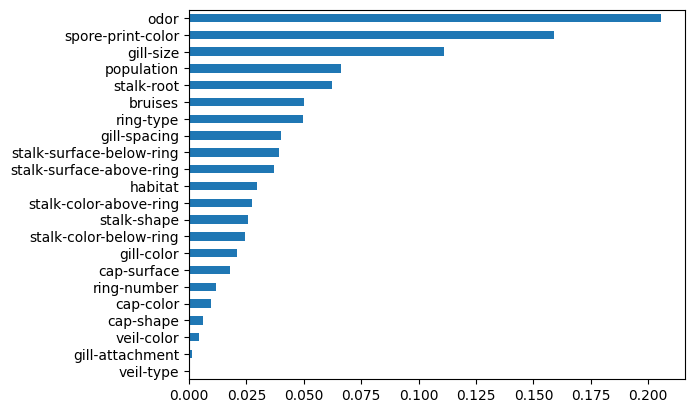

In [17]:
plt.figure()
imp.plot(kind='barh')
plt.show()

## Отбор признаков

In [18]:
df = df.drop(columns=['veil-type', 'veil-color', 'gill-attachment', 'cap-shape'])
rows, columns = df.shape

In [19]:
df.head()

,class,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,6,4,6
1,0,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,1,4,6
2,0,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,6,4,6
3,0,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,1,4,6
4,0,3,8,0,0,1,1,1,1,1,3,3,7,7,1,4,6,4,6


In [20]:
df.columns

Index(['class', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Разделение датасета для обучения

In [21]:
X = df.drop(columns=['class'])
Y = pd.get_dummies(df['class'])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [24]:
print(f"Train dataset shape: {x_train.shape}, {y_train.shape}")
print(f"Test dataset shape:  {x_test.shape}, {y_test.shape}")

Train dataset shape: (5891, 18), (5891, 2)
Test dataset shape:  (2525, 18), (2525, 2)


# Решение

In [25]:
model = Network() 
model.add(Input(18)) 
model.add(Dense(15, activation=Sigmoid))
model.add(Dense(10, activation=Sigmoid))
model.add(Dense(2, activation=Sigmoid)) 
model.compile(loss=MSE) 
model.fit(X_train=x_train, Y_train=y_train, epochs=100, learning_rate=.01) 
y_pred = model.predict(X=x_test)

Compilation...


100%|██████████| 3/3 [00:00<00:00, 3001.65it/s]


Learning...


100%|██████████| 5891/5891 [00:00<00:00, 7634.94it/s]


Epoch 1/100: loss=0.23288029458776113


100%|██████████| 5891/5891 [00:00<00:00, 7456.99it/s]


Epoch 2/100: loss=0.16596930447561895


100%|██████████| 5891/5891 [00:00<00:00, 8036.48it/s]


Epoch 3/100: loss=0.1213779565138034


100%|██████████| 5891/5891 [00:00<00:00, 7632.20it/s]


Epoch 4/100: loss=0.10527743176671374


100%|██████████| 5891/5891 [00:00<00:00, 8320.62it/s]


Epoch 5/100: loss=0.09991372692470049


100%|██████████| 5891/5891 [00:00<00:00, 8320.21it/s]


Epoch 6/100: loss=0.09674031997304318


100%|██████████| 5891/5891 [00:00<00:00, 8004.01it/s]


Epoch 7/100: loss=0.09436338568846939


100%|██████████| 5891/5891 [00:00<00:00, 8407.93it/s]


Epoch 8/100: loss=0.09229937303134977


100%|██████████| 5891/5891 [00:00<00:00, 7928.33it/s]


Epoch 9/100: loss=0.09058665530609601


100%|██████████| 5891/5891 [00:00<00:00, 7831.39it/s]


Epoch 10/100: loss=0.0887213087827654


100%|██████████| 5891/5891 [00:00<00:00, 7928.59it/s]


Epoch 11/100: loss=0.08649148792512695


100%|██████████| 5891/5891 [00:00<00:00, 8348.85it/s]


Epoch 12/100: loss=0.08381098974984531


100%|██████████| 5891/5891 [00:00<00:00, 8104.68it/s]


Epoch 13/100: loss=0.08051348822642769


100%|██████████| 5891/5891 [00:00<00:00, 8114.39it/s]


Epoch 14/100: loss=0.07679282745660515


100%|██████████| 5891/5891 [00:00<00:00, 8336.83it/s]


Epoch 15/100: loss=0.07328534827772333


100%|██████████| 5891/5891 [00:00<00:00, 7896.45it/s]


Epoch 16/100: loss=0.07002869281855839


100%|██████████| 5891/5891 [00:00<00:00, 7926.86it/s]


Epoch 17/100: loss=0.06692538272432759


100%|██████████| 5891/5891 [00:00<00:00, 8320.22it/s]


Epoch 18/100: loss=0.06387096342534228


100%|██████████| 5891/5891 [00:00<00:00, 8213.84it/s]


Epoch 19/100: loss=0.060682880025127436


100%|██████████| 5891/5891 [00:00<00:00, 8036.54it/s]


Epoch 20/100: loss=0.05749285875969772


100%|██████████| 5891/5891 [00:00<00:00, 7879.09it/s]


Epoch 21/100: loss=0.05450811929393032


100%|██████████| 5891/5891 [00:00<00:00, 8285.63it/s]


Epoch 22/100: loss=0.051701972659708786


100%|██████████| 5891/5891 [00:00<00:00, 7932.79it/s]


Epoch 23/100: loss=0.04912646003277134


100%|██████████| 5891/5891 [00:00<00:00, 7802.65it/s]


Epoch 24/100: loss=0.046644010572074304


100%|██████████| 5891/5891 [00:00<00:00, 8208.64it/s]


Epoch 25/100: loss=0.04396764465622677


100%|██████████| 5891/5891 [00:00<00:00, 8302.97it/s]


Epoch 26/100: loss=0.041221621033782116


100%|██████████| 5891/5891 [00:00<00:00, 7954.72it/s]


Epoch 27/100: loss=0.03698844747069832


100%|██████████| 5891/5891 [00:00<00:00, 8125.16it/s]


Epoch 28/100: loss=0.030773125501717766


100%|██████████| 5891/5891 [00:00<00:00, 8088.06it/s]


Epoch 29/100: loss=0.02556090746243236


100%|██████████| 5891/5891 [00:00<00:00, 8332.31it/s]


Epoch 30/100: loss=0.022494179550569933


100%|██████████| 5891/5891 [00:00<00:00, 8204.35it/s]


Epoch 31/100: loss=0.020638611870216202


100%|██████████| 5891/5891 [00:00<00:00, 8114.34it/s]


Epoch 32/100: loss=0.01936674194169339


100%|██████████| 5891/5891 [00:00<00:00, 8308.51it/s]


Epoch 33/100: loss=0.018436648779160403


100%|██████████| 5891/5891 [00:00<00:00, 8171.65it/s]


Epoch 34/100: loss=0.017720305896982223


100%|██████████| 5891/5891 [00:00<00:00, 8003.72it/s]


Epoch 35/100: loss=0.017139772318849632


100%|██████████| 5891/5891 [00:00<00:00, 8236.38it/s]


Epoch 36/100: loss=0.0166483019203216


100%|██████████| 5891/5891 [00:00<00:00, 7835.12it/s]


Epoch 37/100: loss=0.01621699698489403


100%|██████████| 5891/5891 [00:00<00:00, 8192.97it/s]


Epoch 38/100: loss=0.01582679245050861


100%|██████████| 5891/5891 [00:00<00:00, 8308.90it/s]


Epoch 39/100: loss=0.015465094540369892


100%|██████████| 5891/5891 [00:00<00:00, 8193.33it/s]


Epoch 40/100: loss=0.01511346828391843


100%|██████████| 5891/5891 [00:00<00:00, 8241.78it/s]


Epoch 41/100: loss=0.014517444406453413


100%|██████████| 5891/5891 [00:00<00:00, 8336.04it/s]


Epoch 42/100: loss=0.013671763390459423


100%|██████████| 5891/5891 [00:00<00:00, 7781.67it/s]


Epoch 43/100: loss=0.013071434069402588


100%|██████████| 5891/5891 [00:00<00:00, 7851.22it/s]


Epoch 44/100: loss=0.012434705219837546


100%|██████████| 5891/5891 [00:00<00:00, 7804.90it/s]


Epoch 45/100: loss=0.008026489006419103


100%|██████████| 5891/5891 [00:00<00:00, 8125.16it/s]


Epoch 46/100: loss=0.00625064688264459


100%|██████████| 5891/5891 [00:00<00:00, 7813.03it/s]


Epoch 47/100: loss=0.005715333711211857


100%|██████████| 5891/5891 [00:00<00:00, 7907.48it/s]


Epoch 48/100: loss=0.005373075124477085


100%|██████████| 5891/5891 [00:00<00:00, 7858.92it/s]


Epoch 49/100: loss=0.005123591077733182


100%|██████████| 5891/5891 [00:00<00:00, 8332.51it/s]


Epoch 50/100: loss=0.004928263318730702


100%|██████████| 5891/5891 [00:00<00:00, 8254.87it/s]


Epoch 51/100: loss=0.004769818160772337


100%|██████████| 5891/5891 [00:00<00:00, 7950.07it/s]


Epoch 52/100: loss=0.004637267926961794


100%|██████████| 5891/5891 [00:00<00:00, 8118.30it/s]


Epoch 53/100: loss=0.004523473953904179


100%|██████████| 5891/5891 [00:00<00:00, 8331.04it/s]


Epoch 54/100: loss=0.004423914892066958


100%|██████████| 5891/5891 [00:00<00:00, 8067.37it/s]


Epoch 55/100: loss=0.004335652853600248


100%|██████████| 5891/5891 [00:00<00:00, 8135.97it/s]


Epoch 56/100: loss=0.004256669387240599


100%|██████████| 5891/5891 [00:00<00:00, 8069.88it/s]


Epoch 57/100: loss=0.004185488912264046


100%|██████████| 5891/5891 [00:00<00:00, 8289.00it/s]


Epoch 58/100: loss=0.004120973746267963


100%|██████████| 5891/5891 [00:00<00:00, 8014.97it/s]


Epoch 59/100: loss=0.004062212275435386


100%|██████████| 5891/5891 [00:00<00:00, 7871.62it/s]


Epoch 60/100: loss=0.004008455603190462


100%|██████████| 5891/5891 [00:00<00:00, 8136.37it/s]


Epoch 61/100: loss=0.003959079042342045


100%|██████████| 5891/5891 [00:00<00:00, 7942.62it/s]


Epoch 62/100: loss=0.00391355652459741


100%|██████████| 5891/5891 [00:00<00:00, 8254.61it/s]


Epoch 63/100: loss=0.0038714421068217265


100%|██████████| 5891/5891 [00:00<00:00, 7836.59it/s]


Epoch 64/100: loss=0.0038323557640065325


100%|██████████| 5891/5891 [00:00<00:00, 7979.74it/s]


Epoch 65/100: loss=0.0037959720734620462


100%|██████████| 5891/5891 [00:00<00:00, 7975.42it/s]


Epoch 66/100: loss=0.0037620110371466907


100%|██████████| 5891/5891 [00:00<00:00, 7950.10it/s]


Epoch 67/100: loss=0.0037302305792645445


100%|██████████| 5891/5891 [00:00<00:00, 7781.71it/s]


Epoch 68/100: loss=0.0037004203940898665


100%|██████████| 5891/5891 [00:00<00:00, 8058.13it/s]


Epoch 69/100: loss=0.0036723968934570207


100%|██████████| 5891/5891 [00:00<00:00, 8266.27it/s]


Epoch 70/100: loss=0.0036459990516009805


100%|██████████| 5891/5891 [00:00<00:00, 8320.64it/s]


Epoch 71/100: loss=0.003621084981443874


100%|██████████| 5891/5891 [00:00<00:00, 7875.35it/s]


Epoch 72/100: loss=0.0035975291061984163


100%|██████████| 5891/5891 [00:00<00:00, 8003.73it/s]


Epoch 73/100: loss=0.003575219815106097


100%|██████████| 5891/5891 [00:00<00:00, 8103.15it/s]


Epoch 74/100: loss=0.003554057512994732


100%|██████████| 5891/5891 [00:00<00:00, 8345.49it/s]


Epoch 75/100: loss=0.00353395299061182


100%|██████████| 5891/5891 [00:00<00:00, 7884.18it/s]


Epoch 76/100: loss=0.003514826056822771


100%|██████████| 5891/5891 [00:00<00:00, 7861.69it/s]


Epoch 77/100: loss=0.003496604385221352


100%|██████████| 5891/5891 [00:00<00:00, 7969.89it/s]


Epoch 78/100: loss=0.0034792225369223366


100%|██████████| 5891/5891 [00:00<00:00, 8193.34it/s]


Epoch 79/100: loss=0.003462621128696348


100%|██████████| 5891/5891 [00:00<00:00, 8308.82it/s]


Epoch 80/100: loss=0.0034467461215150486


100%|██████████| 5891/5891 [00:00<00:00, 8102.79it/s]


Epoch 81/100: loss=0.003431548209290708


100%|██████████| 5891/5891 [00:00<00:00, 8196.86it/s]


Epoch 82/100: loss=0.003416982291364322


100%|██████████| 5891/5891 [00:00<00:00, 8312.91it/s]


Epoch 83/100: loss=0.003403007015310527


100%|██████████| 5891/5891 [00:00<00:00, 8114.22it/s]


Epoch 84/100: loss=0.0033895843790461276


100%|██████████| 5891/5891 [00:00<00:00, 8147.97it/s]


Epoch 85/100: loss=0.00337667938317278


100%|██████████| 5891/5891 [00:00<00:00, 8290.11it/s]


Epoch 86/100: loss=0.003364259726052169


100%|██████████| 5891/5891 [00:00<00:00, 8076.92it/s]


Epoch 87/100: loss=0.003352295535382341


100%|██████████| 5891/5891 [00:00<00:00, 7771.76it/s]


Epoch 88/100: loss=0.0033407591310748433


100%|██████████| 5891/5891 [00:00<00:00, 8036.80it/s]


Epoch 89/100: loss=0.003329624815073822


100%|██████████| 5891/5891 [00:00<00:00, 8231.07it/s]


Epoch 90/100: loss=0.003318868684448549


100%|██████████| 5891/5891 [00:00<00:00, 8147.09it/s]


Epoch 91/100: loss=0.003308468464655884


100%|██████████| 5891/5891 [00:00<00:00, 7942.84it/s]


Epoch 92/100: loss=0.003298403360339465


100%|██████████| 5891/5891 [00:00<00:00, 7971.71it/s]


Epoch 93/100: loss=0.0032886539214186696


100%|██████████| 5891/5891 [00:00<00:00, 8415.74it/s]


Epoch 94/100: loss=0.0032792019225446893


100%|██████████| 5891/5891 [00:00<00:00, 7988.09it/s]


Epoch 95/100: loss=0.0032700302542701108


100%|██████████| 5891/5891 [00:00<00:00, 8125.52it/s]


Epoch 96/100: loss=0.0032611228245051803


100%|██████████| 5891/5891 [00:00<00:00, 8170.62it/s]


Epoch 97/100: loss=0.0032524644690246855


100%|██████████| 5891/5891 [00:00<00:00, 8261.86it/s]


Epoch 98/100: loss=0.0032440408699495452


100%|██████████| 5891/5891 [00:00<00:00, 8052.44it/s]


Epoch 99/100: loss=0.0032358384812643634


100%|██████████| 5891/5891 [00:00<00:00, 8114.35it/s]


Epoch 100/100: loss=0.0032278444605476474
Prediction...


100%|██████████| 2525/2525 [00:00<00:00, 29706.87it/s]


In [26]:
pred = list()
true = list() 
for i in range(len(y_pred)): 
    pred.append(np.argmax(y_pred[i]))
    true.append(np.argmax(y_test[i]))
true = target_le.inverse_transform(true)
pred = target_le.inverse_transform(pred)

# Результаты

## История обучения

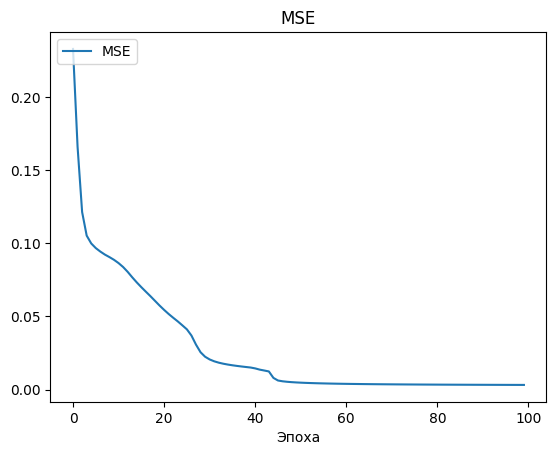

In [27]:
Plot.plot_history_trend(history=model.history, metric='MSE') 

## Метрики

In [28]:
Metric.print_classification_metrics(y_true=true, y_pred=pred)

           POISONOUS    EDIBLE
Accuracy    0.997228  0.997228
Precision   0.996584  0.997784
Recall      0.997436  0.997048
F1 score    0.997010  0.997416


## ROC-кривая

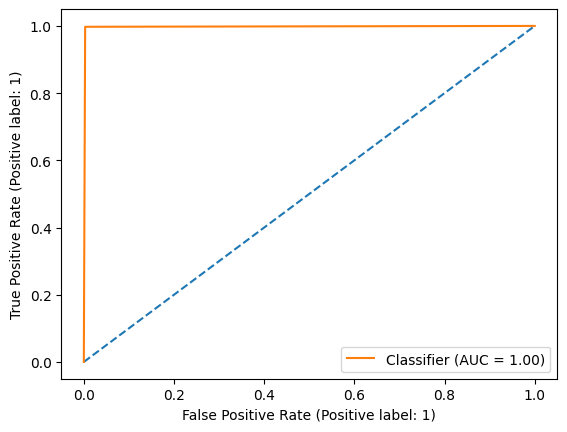

In [29]:
Plot.plot_roc_curve(y_true=target_le.transform(true), y_pred=target_le.transform(pred), labels=[1]) 

## Матрица ошибок

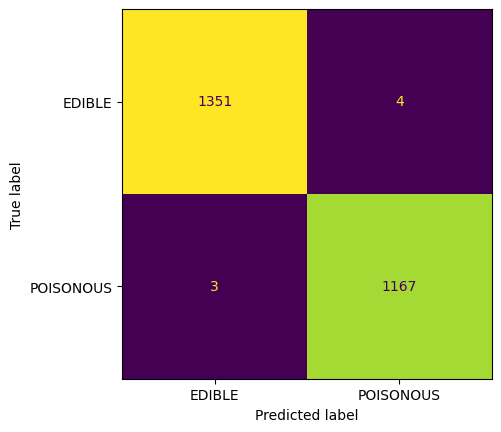

In [30]:
Plot.plot_confusion_matrix(y_true=true, y_pred=pred) 